In [36]:
import pandas as pd

file_path = 'gts-seoul.csv'
df = pd.read_csv(file_path)

tmp = df[df['일시'] == '2011-03-21 06:00']
print(tmp[['습도', '풍속', '현지기압', '기온', '이슬점 온도']].sum().sum())

1038.9


In [37]:
ppd = df[['습도', '풍속', '현지기압', '기온', '이슬점 온도']]
ppd = ppd.dropna()
print(len(ppd)+ppd['습도'].mean()+ppd['풍속'].max()+ppd['기온'].min())

32128.421619683173


In [38]:
var = ['습도', '풍속', '현지기압', '기온']
corr_sum = sum(ppd[x].corr(ppd['이슬점 온도']) for x in var)
print(corr_sum)

1.1792022126818178


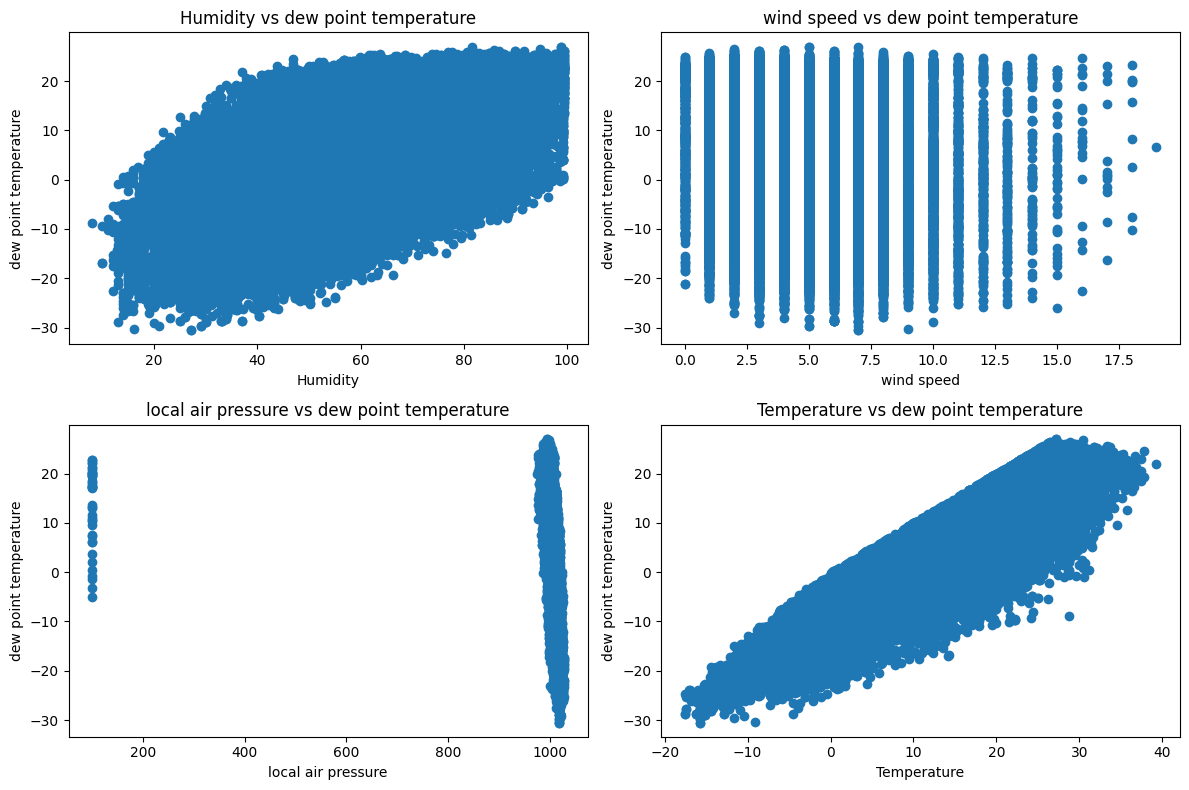

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

# 습도와 이슬점 온도 산점도
plt.subplot(2, 2, 1)
plt.scatter(ppd['습도'], ppd['이슬점 온도'])
plt.xlabel('Humidity')
plt.ylabel('dew point temperature')
plt.title('Humidity vs dew point temperature')

# 풍속과 이슬점 온도 산점도
plt.subplot(2, 2, 2)
plt.scatter(ppd['풍속'], ppd['이슬점 온도'])
plt.xlabel('wind speed')
plt.ylabel('dew point temperature')
plt.title('wind speed vs dew point temperature')

# 현지기압과 이슬점 온도 산점도
plt.subplot(2, 2, 3)
plt.scatter(ppd['현지기압'], ppd['이슬점 온도'])
plt.xlabel('local air pressure')
plt.ylabel('dew point temperature')
plt.title('local air pressure vs dew point temperature')

# 기온과 이슬점 온도 산점도
plt.subplot(2, 2, 4)
plt.scatter(ppd['기온'], ppd['이슬점 온도'])
plt.xlabel('Temperature')
plt.ylabel('dew point temperature')
plt.title('Temperature vs dew point temperature')

# 그림 저장
plt.tight_layout()
plt.savefig('scatter_plots.png')
plt.show()

In [5]:
ppd = ppd.drop(ppd[ppd['현지기압'] < 200].index)
print(len(ppd))

32027


In [6]:
var = ['습도', '풍속', '현지기압', '기온']
corr_sum = sum(ppd[x].corr(ppd['이슬점 온도']) for x in var)
print(corr_sum)

0.6187252015474827


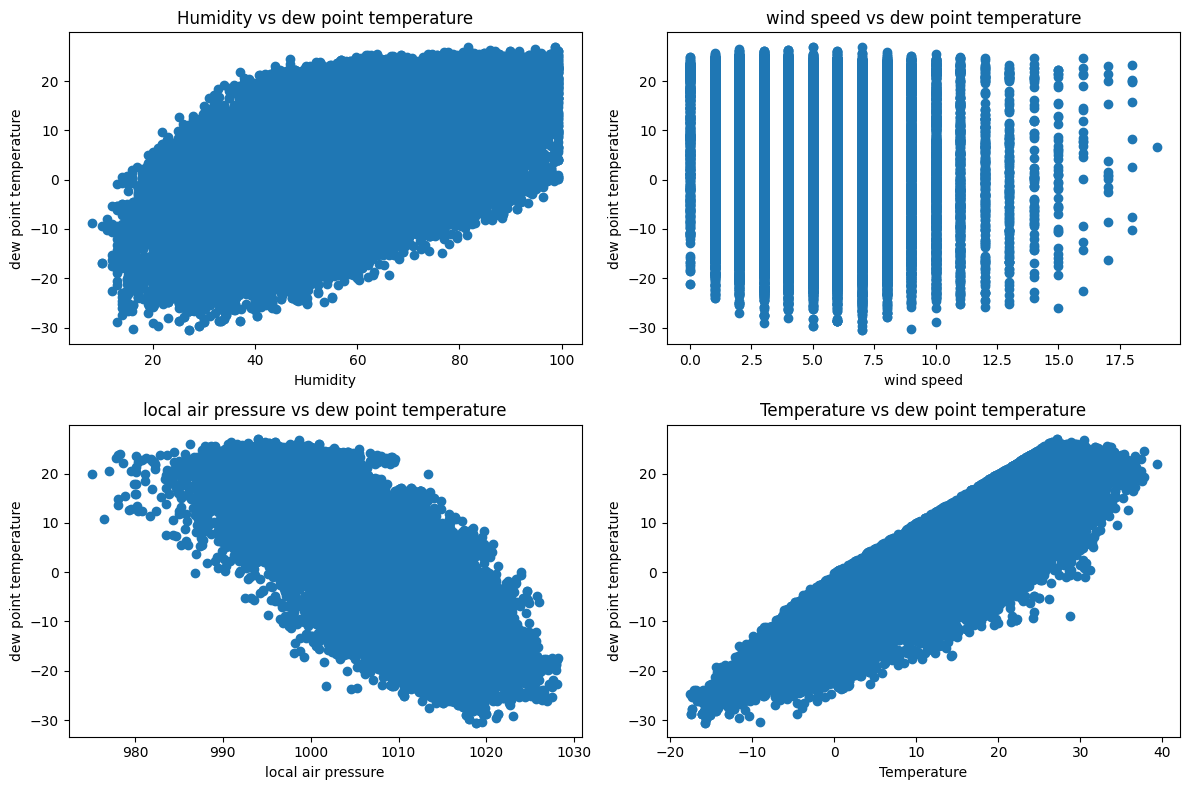

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
# 습도와 이슬점 온도 산점도
plt.subplot(2, 2, 1)
plt.scatter(ppd['습도'], ppd['이슬점 온도'])
plt.xlabel('Humidity')
plt.ylabel('dew point temperature')
plt.title('Humidity vs dew point temperature')

# 풍속과 이슬점 온도 산점도
plt.subplot(2, 2, 2)
plt.scatter(ppd['풍속'], ppd['이슬점 온도'])
plt.xlabel('wind speed')
plt.ylabel('dew point temperature')
plt.title('wind speed vs dew point temperature')

# 현지기압과 이슬점 온도 산점도
plt.subplot(2, 2, 3)
plt.scatter(ppd['현지기압'], ppd['이슬점 온도'])
plt.xlabel('local air pressure')
plt.ylabel('dew point temperature')
plt.title('local air pressure vs dew point temperature')

# 기온과 이슬점 온도 산점도
plt.subplot(2, 2, 4)
plt.scatter(ppd['기온'], ppd['이슬점 온도'])
plt.xlabel('Temperature')
plt.ylabel('dew point temperature')
plt.title('Temperature vs dew point temperature')

# 그림 저장
plt.tight_layout()
plt.savefig('scatter_plots.png')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
x = ppd[['습도','풍속','현지기압','기온']]
y = ppd['이슬점 온도']
model = LinearRegression()
model.fit(x,y)
print(model.coef_, model.intercept_)

[ 0.2676329  -0.03078923  0.00952646  0.92936961] -32.91662937401224


In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np
test_x = ppd['이슬점 온도']
predicted = np.dot(x, model.coef_) + model.intercept_
print(mean_squared_error(test_x, predicted))

1.168514629572586


In [2]:
import pickle
data = pickle.load(open("mid_animal_data_pub.pkl","rb"))

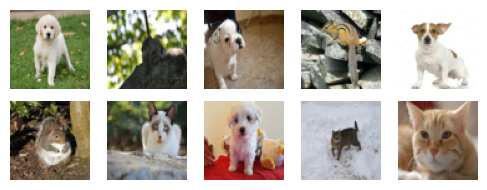

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,5,figsize=(5,2))
for i, ax in enumerate(axes.ravel()):
  ax.imshow(data['test1_images'][i])
  ax.axis('off')
plt.tight_layout()
plt.savefig('10-animal.png')
plt.show()

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(data["train_vectors"],data["test1_vectors"])[0][1])

-0.23914206


In [15]:
c=cosine_similarity(data['test1_vectors'], data['train_vectors'])
clist = [np.argsort(x)[-3:] for x in c]
print(np.sum(clist))

14090


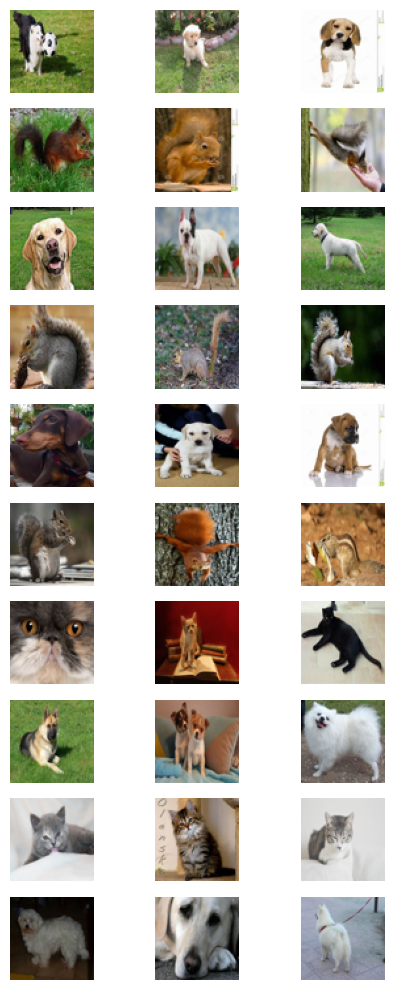

In [20]:
fig, axes = plt.subplots(10,3, figsize=(5,10))

for i, ix in enumerate(clist):
  for j, jx in enumerate(ix):
    axes[i,j].imshow(data['train_images'][jx])
    axes[i,j].axis('off')
plt.tight_layout()
plt.savefig('30-animal.png')
plt.show()

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x_train = torch.from_numpy(data["train_vectors"])
y_train = torch.from_numpy(data["train_labels"])

model = nn.Linear(256,3)
optim = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(10001):
  z = model(x_train)
  cost = F.cross_entropy(z, y_train)

  optim.zero_grad()
  cost.backward()
  optim.step()

  with torch.no_grad():
    if epoch % 1000 == 0:
      print(f"epcoh:{epoch}, cost: {cost.item()}")

epcoh:0, cost: 3.822108745574951
epcoh:1000, cost: 6.836807733634487e-05
epcoh:2000, cost: 4.92061662953347e-05
epcoh:3000, cost: 3.646152254077606e-05
epcoh:4000, cost: 2.6431223886902444e-05
epcoh:5000, cost: 1.866883030743338e-05
epcoh:6000, cost: 1.272474582947325e-05
epcoh:7000, cost: 8.373487617063802e-06
epcoh:8000, cost: 5.360932846087962e-06
epcoh:9000, cost: 3.367168801560183e-06
epcoh:10000, cost: 2.088564542646054e-06


In [18]:
x_test = torch.from_numpy(data["test2_vectors"])
with torch.no_grad():
  outputs = model(x_test)
  predicted = torch.argmax(outputs, dim=1)
astr = ''.join(map(str, predicted.numpy()))
print(astr)

212220001122112100202120111122


In [29]:
# 이상치 탐색 및 처리
# 위에서 만든 데이터프레임에서 이상치를 찾아보세요.
# 이상치는 각 열의 1분위수와 3분위수를 이용하여 계산된 IQR(Interquartile Range)보다 1.5*IQR 이상 떨어진 데이터로 정의합니다.
# 이상치를 찾은 후, 이상치가 포함된 행을 모두 제거하고 남은 데이터의 행 수를 계산하세요.

ppd2 = df[['습도', '풍속', '현지기압', '기온', '이슬점 온도']]
ppd2 = ppd2.dropna()

Q1 = ppd2[['습도', '풍속', '현지기압', '기온', '이슬점 온도']].quantile(0.25)
Q3 = ppd2[['습도', '풍속', '현지기압', '기온', '이슬점 온도']].quantile(0.75)

IQR = Q3 - Q1
is_outlier = ((ppd2[['습도', '풍속', '현지기압', '기온', '이슬점 온도']] < (Q1 - 1.5 * IQR)) | (ppd2[['습도', '풍속', '현지기압', '기온', '이슬점 온도']] > (Q3 + 1.5 * IQR))).any(axis=1)
df_no_outliers = ppd2[~is_outlier]

print(len(df_no_outliers))

31149


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:359: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:359: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.tight_layout()


ADF Statistic: -4.130783911307516
p-value: 0.0008610665253672897
Critical Values: {'1%': -3.430554267378118, '5%': -2.861630280868486, '10%': -2.5668180537149357}


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


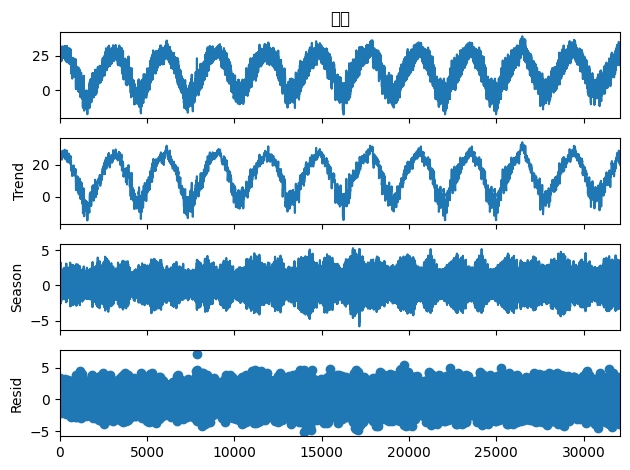

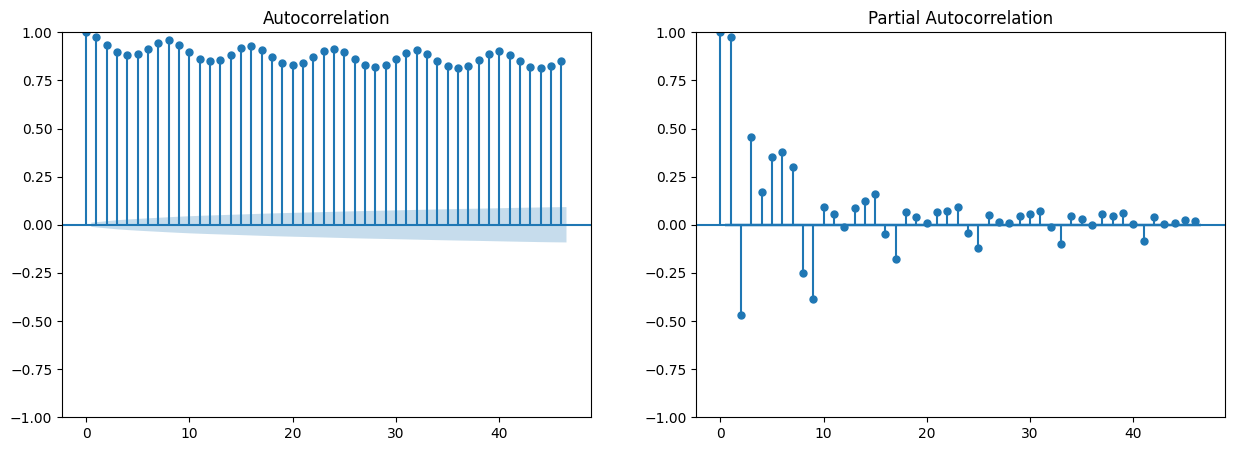

In [46]:
# 문제 4. 시계열 분석
from scipy.stats import zscore
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
# STL 분해

stl = STL(ppd['기온'], seasonal=7, period=7)
result = stl.fit()
fig = result.plot()

# ACF 및 PACF 그래프
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(ppd['기온'], ax=axs[0])
plot_pacf(ppd['기온'], ax=axs[1])

# ADF 테스트
result = adfuller(ppd['기온'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

In [12]:
# 문제 1: 다중 선형 회귀
# data['train_vectors']를 독립 변수, data['train_labels']를 종속 변수로 사용하여 다중 선형 회귀 모델을 만들고, 회귀 계수를 구하세요.
# 회귀 계수 중 가장 큰 값을 제출하세요.

# 문제 2: 로지스틱 회귀
# data['train_vectors']를 독립 변수, data['train_labels']가 '고양이'일 때 1, 나머지 경우에는 0으로 변환하여 종속 변수로 사용하여 로지스틱 회귀 모델을 만들고, 예측 정확도를 구하세요.
# 정확도 값을 제출하세요.

# 문제 3: 소프트맥스 회귀
# data['train_vectors']와 data['train_labels']를 사용하여 소프트맥스 회귀 모델을 만들고, 학습해보세요.
# 학습한 모델을 사용하여 data['test2_vectors']에 대한 예측값을 구하고, 결과를 문자열로 제출하세요.

from sklearn.linear_model import LinearRegression, LogisticRegression
import torch
import numpy as np

In [13]:
# 문제 1: 다중 선형 회귀
linear_reg = LinearRegression()
linear_reg.fit(torch.from_numpy(data["train_vectors"]), torch.from_numpy(data["train_labels"]))

# x_train = torch.from_numpy(data["train_vectors"])
# y_train = torch.from_numpy(data["train_labels"])
# max_coef = np.max(linear_reg.coef_)
# print('Max coefficient:', max_coef)
print(linear_reg.coef_)

[-0.14600967 -1.3287053   1.2603385  -0.29165107  0.0594216  -0.6811252
 -0.49422356  0.26849952 -0.5665018   0.4578646  -0.510491   -1.0925407
  0.04108096  0.17445256 -1.1641669  -0.9556146   0.3769427  -0.34315276
 -1.1843749  -0.45506802  0.84021056 -0.42107466  0.85194564  0.33526102
 -0.5569925  -0.3030547   1.1779461   0.03520498 -0.22414576  0.03686585
 -0.31151462  0.13100043  0.7204609   0.31993476 -0.19343588 -0.14375311
 -0.21151972  1.6672776   0.04844098  0.63586074  0.19565505  0.2963451
 -0.3949164   1.1516917  -0.02439398  0.19307691 -0.3977131   0.62012213
  0.3525985   2.025504    0.6545053  -1.1363225  -1.79249    -2.2296457
 -0.65035534 -0.1792134   0.11134019 -0.920638    0.19257554 -0.3678418
 -1.2512835   0.23309478 -1.0649881   0.84829324  0.31626704 -0.6355926
 -0.8349395   0.5532842  -0.36687332 -0.523104    0.44776133  0.72699803
 -0.29761136  0.97855705 -0.9305157  -0.54500085  0.12729049 -0.20662999
 -0.44609928  0.26901096  0.59454054  0.156659    0.11479

In [30]:
# 문제 2: 로지스틱 회귀
binary_labels = np.where(data["train_labels"] == 2, 1, 0)
logistic_reg = LogisticRegression()

x_1 = torch.from_numpy(data["train_vectors"])
y_1 = torch.from_numpy(binary_labels)

logistic_reg.fit(x_1, y_1)
accuracy = logistic_reg.score(x_1, y_1)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [34]:
binary_labels = np.where(data['train_labels'] == 2, 1, 0)
logistic_reg = LogisticRegression()
logistic_reg.fit(data['train_vectors'], binary_labels)
accuracy = logistic_reg.score(data['train_vectors'], binary_labels)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [10]:
# 문제 3: 소프트맥스 회귀
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_reg.fit(data['train_vectors'], data['train_labels'])
predictions = softmax_reg.predict(data['test2_vectors'])
print('Predictions:', predictions)

Predictions: [2 1 2 2 2 0 0 0 1 1 2 2 1 1 2 1 0 0 2 0 2 1 2 0 1 1 1 1 2 2]


In [76]:
# 문제 4. 벡터 거리 계산
from sklearn.metrics.pairwise import euclidean_distances
distances = euclidean_distances(data['test1_vectors'][9].reshape(1, -1), data['train_vectors'])
indices = np.argsort(distances)[0][:3]
print('Top 3 closest vectors indices:', indices)
print('Sum of indices:', np.sum(indices))

c=cosine_similarity(data['test1_vectors'], data['train_vectors'])
clist = [np.argsort(x)[-3:] for x in c]
print(np.sum(clist))

Top 3 closest vectors indices: [447 756 976]
Sum of indices: 2179
14090


In [77]:
# 문제 5. 다층 퍼셉트론 (MLP) 구현
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(data['train_vectors'].shape[1], 100)
        self.fc2 = nn.Linear(100, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
model = MLP()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
train_vectors = torch.tensor(data['train_vectors']).float()
train_labels = torch.tensor(data['train_labels']).long()

for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    outputs = model(train_vectors)
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

model.eval()
test_vectors = torch.tensor(data['test2_vectors']).float()
with torch.no_grad():
    predictions = model(test_vectors).argmax(dim=1).numpy()
print('Predictions:', ''.join(map(str, predictions)))

Epoch 0, Loss: 1.0510709285736084
Epoch 100, Loss: 3.151254304611939e-06
Epoch 200, Loss: 1.90906462194107e-06
Epoch 300, Loss: 1.2808567362299073e-06
Epoch 400, Loss: 9.194923222821672e-07
Epoch 500, Loss: 6.923697242200433e-07
Epoch 600, Loss: 5.410198014033085e-07
Epoch 700, Loss: 4.350680740117241e-07
Epoch 800, Loss: 3.579546046239557e-07
Epoch 900, Loss: 3.0002820494701155e-07
Predictions: 212220001122112100202120111122


In [50]:
from sklearn.neural_network import MLPClassifier

# 모델 초기화
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, learning_rate_init=0.01)

# 모델 학습
model.fit(data['train_vectors'], data['train_labels'])

# 예측
predictions = model.predict(data['test2_vectors'])

# 결과 출력
print('Predictions:', ''.join(map(str, predictions)))


Predictions: 212220001122112100202120111122


In [49]:
print(212220001122112100202120111122 == 212220001122112100202120111122)

True


In [51]:
# 문제 6: 직교화와 정규화
v1 = data['train_vectors'][0]
v2 = data['train_vectors'][1]
v2_orthogonal = v2 - np.dot(v2, v1) / np.dot(v1, v1) * v1
v2_orthogonal_normalized = v2_orthogonal / np.linalg.norm(v2_orthogonal)
print('First element of normalized vector:', v2_orthogonal_normalized[0])

First element of normalized vector: 0.038102876


In [52]:
# 문제 7: 고유값과 고유벡터
cov_matrix = np.cov(data['train_vectors'], rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
max_eigenvalue_index = np.argmax(eigenvalues)
max_eigenvector = eigenvectors[:, max_eigenvalue_index]
print('First element of max eigenvector:', max_eigenvector[0])

First element of max eigenvector: 0.013690084592748076


In [53]:
# 문제 8: 행렬의 랭크
matrix_rank = np.linalg.matrix_rank(data['train_vectors'])
print('Matrix rank:', matrix_rank)

Matrix rank: 245


In [55]:
# 문제 9: 피어슨 상관계수
correlation_coefficient = np.corrcoef(data['train_vectors'][:, 0], data['train_labels'])[0, 1]
print('Pearson correlation coefficient:', correlation_coefficient)

Pearson correlation coefficient: -0.8641604469832636


In [58]:
# 문제 10: 데이터 변환
# data['train_vectors']의 모든 값을 로그 변환하여 새로운 변수에 저장하세요. 그리고 변환된 데이터의 평균과 표준편차를 구하세요. 계산된 평균과 표준편차 값을 제출하세요.
# log_transformed = np.log(data['train_vectors'])
log_transformed = np.log(data['train_vectors'])
mean = np.mean(log_transformed)
std = np.std(log_transformed)
print('Mean and std of log-transformed data:', mean, std)

Mean and std of log-transformed data: nan nan


<ipython-input-58-6c103472b876>:4: RuntimeWarning: invalid value encountered in log
  log_transformed = np.log(data['train_vectors'])


In [59]:
print(data['train_vectors'])

[[ 6.765437    2.335988    2.2718782  ... -3.7908099  -5.7790656
  -8.452645  ]
 [ 3.9811578   0.8993346   0.3574735  ... -0.40794182 -3.505698
  -5.865824  ]
 [ 1.5094669  -1.108995   -2.3785057  ...  4.175896   -1.3695054
  -3.9586785 ]
 ...
 [ 3.8107047   1.5099052   1.7827855  ... -2.885677   -3.352014
  -4.757718  ]
 [ 7.604       1.8847884   1.2902098  ... -2.2294068  -5.539374
  -8.502373  ]
 [ 5.3538036   2.0250673   1.8471651  ... -3.2370934  -4.578217
  -6.5192943 ]]
